# Diamonds Analysis
The data is scrapped from Australian Diamond Importers website on 24th Feb 2022.
It includes diamond features, like shape, carat, colour, cut, clarity, and other features and the price in AUD (excluding GST).

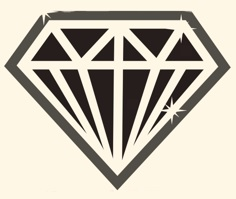 

### About the Data

-  price: min:200 AUD; max:1.449.881 AUD.
-  cut: Fair, Good, Very Good, Excellent, Ideal.
-  color: M (worst), L, K J, I, H, G, F, E, D (best).
-  fluor intensity: None, Faint, Very Slight, Slight, Medium, Strong, Very Strong.
-  clarity: I3 (worst), I2, I1, SI3, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).
-  symmetry: Very Good, Excellent, Good, Fair, Poor.
-  polish: Very Good, Excellent, Good, Fair, Poor.
-  girdle min: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  girdle max: XTN (Extremely Thin), VTN, TN, STN, M, STK, TK, VTK, XTK (Extremely Thick).
-  culet size: ‘N’ (Nano), ‘VS’, ‘S’, ‘M’, ‘SL’, ‘L’, ‘VL’, ‘EL’ (Extremely Large).
-  depth percentage: min: 0.0; max: 98.7.
-  table percentage: min: 0.0; max: 94.0.
-  size:  min: 0.80 carat; max: 19.35 carat.
-  length: 0.00 mm; max: 93.66 mm.
-  width: 0.00 mm; max: 62.3 mm.
-  depth: 0.00 mm; max: 76.3 mm.
-  data size: 26.6 Mb; 219704 rows; 27 columns: float64(6), int64(2), object(19). 


## Table of Content
##### Modeling project based on analyzing diamonds by their cut, color, clarity, price, and other attributes.
#### GOAL
With trying different linear regression models and specifies to find the best model to predict diamond prices.


#### DATA ANALYSIS STEPS

#### Exploration, Cleaning, Editing
- Reading the file and openning it
- Check the data info
- Checking the max and min values of important features
- Standardizing the column names
- Dropping the less important information/columns
- Rearranging columns
- Data subsetting
- Statistical summary of numerical columns
- Removing Duplicates
- Checking the percentage of null values in each column
- Dropping the Columns with more than 70% null values
- Removing the outliers
- Separate Categorical and Numerical Values
- Plotting the histograms of the numerical values
- Plot the Correlation Heatmap to check the correlation obetween numerical values
- Data BoxPlotting
- Get the dummies for the categorical values and drop the first column

#### Modelling
- Split the numerical data to X, Y, train and test sets
- Split the numerical data to X, and y, train and test sets
- Standardization the numerical values
- Transforming the array to the dataframe
- Splitting the categorical dummy values in train and test
- Concatinating numerical and categorical x values
- Modelling using Statsmodel
- Modeling using Scikit Learn
- Making the scatterplots
- Making the Seaborn Residual plot
- Calculating Model Validation, Model Evaluation and Mean Squared Error
- Feature Importance

#### DATA VISUALIZATION
- Transfer data on tableau for visual analysis


### Importing the libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

### Read the file and open it

In [70]:
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,diamond_id,shape,size,color,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24


### Check the data info

In [71]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219704 entries, 0 to 219703
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   diamond_id                   219704 non-null  int64  
 1   shape                        219704 non-null  object 
 2   size                         219704 non-null  float64
 3   color                        210542 non-null  object 
 4   fancy_color_dominant_color   9164 non-null    object 
 5   fancy_color_secondary_color  1062 non-null    object 
 6   fancy_color_overtone         2038 non-null    object 
 7   fancy_color_intensity        9162 non-null    object 
 8   clarity                      219704 non-null  object 
 9   cut                          159097 non-null  object 
 10  symmetry                     219704 non-null  object 
 11  polish                       219704 non-null  object 
 12  depth_percent                219704 non-null  float64
 13 

### Standardizing the column names

All the column names are standardized, we don't need to make any changes but for practicality we make 2 column names shorter

In [72]:

# Method 1 with function

def rename_columns(diamonds):
    diamonds.rename(columns={'fancy_color_dominant_color':'fancy_color_dominant','fancy_color_secondary_color':'fancy_color_secondary', 'size':'carat'}, inplace=True )
    return diamonds
rename_columns(diamonds)

# Method 2 manual 
#diamonds.rename(columns={‘fancy_color_dominant_color’:‘fancy_color_dominant’, ‘fancy_color_secondary_color’:‘fancy_color_secondary’}, inplace=True)
#diamonds


,diamond_id,shape,carat,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,...,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,lab,total_sales_price,eye_clean,date
0,131328926,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,M,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
1,131704776,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
2,131584417,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,TN,M,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
3,131584416,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,...,M,STK,NaN,NaN,NaN,None,IGI,200,NaN,2022-02-24
4,131613644,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,...,STK,STK,N,NaN,NaN,None,IGI,200,NaN,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,135619262,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,M,STK,N,NaN,NaN,None,GIA,1210692,NaN,2022-02-24
219700,135122237,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,...,TK,XTK,NaN,NaN,NaN,None,GIA,1292500,NaN,2022-02-24
219701,135553116,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,...,TN,M,N,NaN,NaN,None,GIA,1315496,NaN,2022-02-24
219702,114752541,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,...,XTN,VTK,N,NaN,NaN,Faint,GIA,1350000,NaN,2022-02-24


 ### Dropping the less important information/columns

the diamond_id, lab and date could be dropped

In [73]:
# Method 1 with function

def drop_columns(diamonds):
    diamonds.drop(columns=["diamond_id","date", 'lab'], inplace=True)
    return diamonds
drop_columns(diamonds)

# Method 2 without function
# diamonds.drop(columns=['diamond_id', 'date'], inplace=True)
# diamonds

,shape,carat,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,clarity,cut,symmetry,...,meas_width,meas_depth,girdle_min,girdle_max,culet_size,culet_condition,fluor_color,fluor_intensity,total_sales_price,eye_clean
0,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.87,1.79,M,M,N,NaN,NaN,None,200,NaN
1,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.89,1.78,STK,STK,N,NaN,NaN,None,200,NaN
2,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.90,1.77,TN,M,NaN,NaN,NaN,None,200,NaN
3,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Excellent,Very Good,...,2.88,1.78,M,STK,NaN,NaN,NaN,None,200,NaN
4,Round,0.09,E,NaN,NaN,NaN,NaN,VVS2,Very Good,Very Good,...,2.83,1.82,STK,STK,N,NaN,NaN,None,200,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,14.18,8.66,M,STK,N,NaN,NaN,None,1210692,NaN
219700,Radiant,5.17,NaN,Green,NaN,None,Fancy Light,VS2,NaN,Very Good,...,8.81,5.71,TK,XTK,NaN,NaN,NaN,None,1292500,NaN
219701,Round,18.07,E,NaN,NaN,NaN,NaN,VS1,Excellent,Excellent,...,17.10,10.20,TN,M,N,NaN,NaN,None,1315496,NaN
219702,Princess,0.90,NaN,Red,NaN,NaN,Fancy,SI2,NaN,Good,...,4.90,3.47,XTN,VTK,N,NaN,NaN,Faint,1350000,NaN


### Rearranging columns

In [74]:
list(diamonds.columns)

['shape',
 'carat',
 'color',
 'fancy_color_dominant',
 'fancy_color_secondary',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'clarity',
 'cut',
 'symmetry',
 'polish',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'culet_size',
 'culet_condition',
 'fluor_color',
 'fluor_intensity',
 'total_sales_price',
 'eye_clean']

In [75]:
diamonds = diamonds[[
 'shape',
 'carat',
 'clarity',
 'cut',
 'symmetry',
 'polish',
 'depth_percent',
 'table_percent',
 'meas_length',
 'meas_width',
 'meas_depth',
 'girdle_min',
 'girdle_max',
 'culet_size',
 'culet_condition',
 'eye_clean',
 'color',
 'fancy_color_dominant',
 'fancy_color_secondary',
 'fancy_color_overtone',
 'fancy_color_intensity',
 'fluor_color',
 'fluor_intensity',
 'total_sales_price'
 ]]

diamonds.head()

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,...,culet_condition,eye_clean,color,fancy_color_dominant,fancy_color_secondary,fancy_color_overtone,fancy_color_intensity,fluor_color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,...,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,None,200


### Statistical summary of numerical columns

In [76]:
temp = diamonds.describe().transpose().round(2)
temp

,count,mean,std,min,25%,50%,75%,max
carat,219704.0,0.76,0.85,0.08,0.31,0.50,1.00,19.35
depth_percent,219704.0,61.68,9.92,0.00,61.20,62.40,63.50,98.70
table_percent,219704.0,57.75,9.96,0.00,57.00,58.00,60.00,94.00
meas_length,219704.0,5.55,1.76,0.00,4.35,5.06,6.35,93.66
meas_width,219704.0,5.14,1.37,0.00,4.31,4.80,5.70,62.30
meas_depth,219704.0,3.29,2.05,0.00,2.68,3.03,3.63,76.30
total_sales_price,219704.0,6908.04,25959.44,200.00,958.00,1970.00,5207.00,1449881.00


### Removing Duplicates

In [77]:
diamonds=diamonds.drop_duplicates()

### Checking the percentage of null values in each column

In [78]:
nulls_df = pd.DataFrame(round(diamonds.isna().sum()/len(diamonds),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,shape,0.00
1,carat,0.00
2,clarity,0.00
3,cut,27.92
4,symmetry,0.00
5,polish,0.00
6,depth_percent,0.00
7,table_percent,0.00
8,meas_length,0.00
9,meas_width,0.00


### Dropping the Columns with more than 70% null values

In [79]:
columns_drop = nulls_df[nulls_df['percent_nulls']>70]['header_name']  # dummy case with 3 
print(columns_drop.values)

['culet_condition' 'eye_clean' 'fancy_color_dominant'
 'fancy_color_secondary' 'fancy_color_overtone' 'fancy_color_intensity'
 'fluor_color']


In [80]:
diamonds.drop(columns=['culet_condition', 'eye_clean','fancy_color_dominant','fancy_color_secondary','fancy_color_overtone' ,'fancy_color_intensity','fluor_color'], inplace=True)
diamonds

,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219699,Round,10.65,VS1,Excellent,Excellent,Excellent,61.3,58.0,14.06,14.18,8.66,M,STK,N,E,None,1210692
219700,Radiant,5.17,VS2,NaN,Very Good,Very Good,64.8,65.0,11.55,8.81,5.71,TK,XTK,NaN,NaN,None,1292500
219701,Round,18.07,VS1,Excellent,Excellent,Excellent,60.2,59.0,17.06,17.10,10.20,TN,M,N,E,None,1315496
219702,Princess,0.90,SI2,NaN,Good,Good,70.8,72.0,5.22,4.90,3.47,XTN,VTK,N,NaN,Faint,1350000


### Removing the Outliers

In [81]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1

diamonds = diamonds[~((diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]
diamonds

C:\Users\isikh\AppData\Local\Temp\ipykernel_19580\682159640.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]


,shape,carat,clarity,cut,symmetry,polish,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,culet_size,color,fluor_intensity,total_sales_price
0,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,N,E,None,200
1,Round,0.09,VVS2,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,N,E,None,200
2,Round,0.09,VVS2,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,NaN,E,None,200
3,Round,0.09,VVS2,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,NaN,E,None,200
4,Round,0.09,VVS2,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,N,E,None,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,56.0,7.36,7.41,4.50,TN,M,N,I,Medium,11791
193896,Round,1.51,SI2,Excellent,Excellent,Excellent,61.0,60.0,7.41,7.44,4.53,M,STK,N,I,Faint,11791
193900,Round,1.51,SI2,Very Good,Excellent,Excellent,63.9,57.0,7.12,7.17,4.56,NaN,NaN,NaN,I,None,11791
193902,Round,1.08,VS2,Excellent,Excellent,Excellent,62.7,57.0,6.54,6.55,4.10,NaN,NaN,NaN,E,None,11791


### Separate Categorical and Numerical Values

In [82]:
#Which columns are categorical?
diamonds_cat = diamonds.select_dtypes('object')
diamonds_cat

,shape,clarity,cut,symmetry,polish,girdle_min,girdle_max,culet_size,color,fluor_intensity
0,Round,VVS2,Excellent,Very Good,Very Good,M,M,N,E,None
1,Round,VVS2,Very Good,Very Good,Very Good,STK,STK,N,E,None
2,Round,VVS2,Excellent,Very Good,Very Good,TN,M,NaN,E,None
3,Round,VVS2,Excellent,Very Good,Very Good,M,STK,NaN,E,None
4,Round,VVS2,Very Good,Very Good,Excellent,STK,STK,N,E,None
...,...,...,...,...,...,...,...,...,...,...
193895,Round,SI2,Excellent,Excellent,Excellent,TN,M,N,I,Medium
193896,Round,SI2,Excellent,Excellent,Excellent,M,STK,N,I,Faint
193900,Round,SI2,Very Good,Excellent,Excellent,NaN,NaN,NaN,I,None
193902,Round,VS2,Excellent,Excellent,Excellent,NaN,NaN,NaN,E,None


In [83]:
diamonds_num = diamonds.select_dtypes('number')
diamonds_num

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
0,0.09,62.7,59.0,2.85,2.87,1.79,200
1,0.09,61.9,59.0,2.84,2.89,1.78,200
2,0.09,61.1,59.0,2.88,2.90,1.77,200
3,0.09,62.0,59.0,2.86,2.88,1.78,200
4,0.09,64.9,58.5,2.79,2.83,1.82,200
...,...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50,11791
193896,1.51,61.0,60.0,7.41,7.44,4.53,11791
193900,1.51,63.9,57.0,7.12,7.17,4.56,11791
193902,1.08,62.7,57.0,6.54,6.55,4.10,11791


### Plotting the histograms of the numerical values

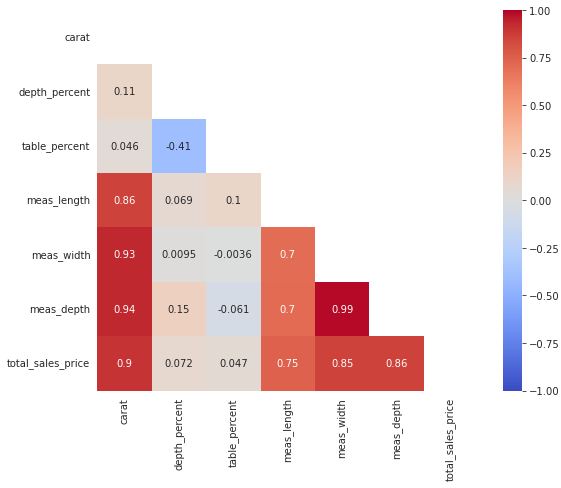

In [84]:
corr = diamonds_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True      
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [85]:
#For the numerical variables, check the multicollinearity between the features. 
diamonds_num.corr()

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
carat,1.000000,0.107376,0.045689,0.857418,0.930751,0.936972,0.904481
depth_percent,0.107376,1.000000,-0.406113,0.069262,0.009522,0.149104,0.072355
table_percent,0.045689,-0.406113,1.000000,0.104356,-0.003566,-0.060642,0.047469
meas_length,0.857418,0.069262,0.104356,1.000000,0.699060,0.703806,0.745690
meas_width,0.930751,0.009522,-0.003566,0.699060,1.000000,0.989032,0.853839
meas_depth,0.936972,0.149104,-0.060642,0.703806,0.989032,1.000000,0.855219
total_sales_price,0.904481,0.072355,0.047469,0.745690,0.853839,0.855219,1.000000


### Data BoxPlotting

In [86]:
# making a copy of our dataframe

#diamonds_replace_cat = diamonds.copy()

##### Replacing categorical to numerical(We can also use this for scaling)

#diamonds_replace_cat['clarity'].replace(['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace= True)
#diamonds_replace_cat['cut'].replace(['Fair', 'Good', 'Very Good', 'Excellent', 'Ideal'], [5, 4, 3, 2, 1], inplace= True)
#diamonds_replace_cat['color'].replace(['M', 'L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D'], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], inplace= True)
#diamonds_replace_cat['fluor_intensity'].replace(['None', 'Faint', 'Very Slight', 'Slight', 'Medium', 'Strong', 'Very Strong'], [7, 6, 5, 4, 3, 2, 1], inplace= True)
#diamonds_replace_cat['symmetry'].replace(['Excellent', 'Very Good','Good', 'Fair', 'Poor'], [1, 2, 3, 4, 5], inplace= True)
#diamonds_replace_cat['polish'].replace(['Excellent', 'Very Good','Good', 'Fair', 'Poor'], [1, 2, 3, 4, 5], inplace= True)
#diamonds_replace_cat['girdle_min'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace= True)
#diamonds_replace_cat['girdle_max'].replace(['XTN', 'VTN', 'TN', 'STN', 'M', 'STK', 'TK', 'VTK', 'XTK'], [1, 2, 3, 4, 5, 6, 7, 8, 9], inplace= True)
#diamonds_replace_cat['culet_size'].replace(['N','VS','S','M','SL','L','VL','EL'], [1, 2, 3, 4, 5, 6, 7, 8], inplace= True)
#diamonds_replace_cat['shape'].replace(['Princess', 'Cushion', 'Heart', 'Pear', 'Oval', 'Marquise', 'Emerald', 'Radiant', 'Cushion Modified', 'Asscher', 'Round'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace= True)
#diamonds_replace_cat

### Get the dummies for the categorical values and drop the first column

In [87]:
diamonds_dummy =pd.get_dummies(diamonds_cat, drop_first=True)
diamonds_dummy

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193895,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
193896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
193900,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
193902,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Modelling

### Split the numerical data to X, and y, train and test sets

In [88]:
# X-y split (y is the target variable which is the total claim amount)

X_num=diamonds_num.drop('total_sales_price', axis=1)
y=diamonds_num.total_sales_price

X_num

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
0,0.09,62.7,59.0,2.85,2.87,1.79
1,0.09,61.9,59.0,2.84,2.89,1.78
2,0.09,61.1,59.0,2.88,2.90,1.77
3,0.09,62.0,59.0,2.86,2.88,1.78
4,0.09,64.9,58.5,2.79,2.83,1.82
...,...,...,...,...,...,...
193895,1.51,61.0,56.0,7.36,7.41,4.50
193896,1.51,61.0,60.0,7.41,7.44,4.53
193900,1.51,63.9,57.0,7.12,7.17,4.56
193902,1.08,62.7,57.0,6.54,6.55,4.10


In [89]:
y

0           200
1           200
2           200
3           200
4           200
          ...  
193895    11791
193896    11791
193900    11791
193902    11791
193903    11791
Name: total_sales_price, Length: 155718, dtype: int64

In [90]:
X_num_train, X_num_test, y_train, y_test=train_test_split(X_num, y, test_size=.30,random_state=123)

X_num_train.shape

(109002, 6)

In [91]:
X_num_test.shape

(46716, 6)

### Standardization the numerical values

In [92]:
std_scaler=StandardScaler().fit(X_num_train)   ## finding the parameters ( mean, variance from the training set )

X_num_train_scaled=std_scaler.transform(X_num_train)  # transforming happening here with this formula

X_num_test_scaled=std_scaler.transform(X_num_test)

### Transforming the array to the dataframe

In [93]:
X_num_train_scaled = pd.DataFrame(X_num_train_scaled, columns=X_num.columns, index=X_num_train.index)
X_num_train_scaled.head()

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344


In [94]:
X_num_test_scaled  = pd.DataFrame(X_num_test_scaled, columns=X_num.columns, index=X_num_test.index)
X_num_test_scaled.head()

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386


### Splitting the categorical dummy values in X, train and test

In [95]:
X_cat = diamonds_dummy
X_cat_train, X_cat_test =train_test_split(X_cat, test_size=.30,random_state=123)

X_cat_train.head()

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
94823,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
146217,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
24910,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
185218,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
140437,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [96]:
X_cat_test.head()

,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
165694,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
115539,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
108831,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
21097,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
186515,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### Concatinating numerical and categorical x values

In [97]:
X_train=pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_train.head()

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
94823,-0.647348,0.110189,0.034419,-0.659544,-0.573563,-0.561288,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
146217,0.384012,0.445319,0.034419,0.293064,0.660116,0.726325,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
24910,-0.718477,-0.426020,-0.479366,-0.754804,-0.671280,-0.736872,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
185218,1.806579,-1.029254,1.061989,1.274250,1.906009,1.701791,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
140437,0.704090,-1.699515,1.575774,0.616951,1.063199,0.765344,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
X_test=pd.concat([X_num_test_scaled, X_cat_test], axis=1)
X_test.head()

,carat,depth_percent,table_percent,meas_length,meas_width,meas_depth,shape_Cushion,shape_Cushion Modified,shape_Emerald,shape_Heart,...,color_J,color_K,color_L,color_M,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
165694,1.806579,0.311267,-0.993151,1.255198,1.906009,1.935902,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
115539,0.348448,0.981528,0.548204,0.169225,0.501325,0.648288,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
108831,-0.007194,-1.163307,0.548204,0.073964,0.354750,0.180065,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21097,-0.967426,-0.157915,-2.020720,0.102543,-1.709524,-1.692828,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
186515,3.549222,-0.358994,1.061989,2.150649,3.066400,2.950386,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Modelling using Statsmodel

In [99]:
X_train_const = sm.add_constant(X_train)     # adding a constant
model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test)       # adding a constant
predictions_test = model.predict(X_test_const)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      total_sales_price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.459e+04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:05:12   Log-Likelihood:            -8.7402e+05
No. Observations:              109002   AIC:                         1.748e+06
Df Residuals:                  108932   BIC:                         1.749e+06
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Modelling using Scikit Learn

In [100]:
#since it is a supervized learning we are giving the y's to the model to learn
model=LinearRegression()    # model
model.fit(X_train, y_train)   # model train

LinearRegression()

In [101]:
model.coef_

array([ 2.55500596e+03,  5.52646700e+01,  2.98249586e+00, -5.98451305e+02,
        1.03445926e+03, -6.83774387e+02, -2.71502928e+02,  1.61574849e+02,
        6.56265716e+02, -5.08758188e+02,  2.16824238e+03,  1.08817773e+03,
        1.50811246e+03,  2.14474676e+03,  1.12083021e+02,  6.88207585e+02,
       -9.14205599e+02, -1.38763941e+03,  1.76349417e+03,  1.09674913e+03,
        7.06349724e+02,  1.49203488e+03,  1.38456591e+03,  1.66779697e+03,
        1.56041247e+03, -3.17076792e+03, -1.17731959e+03, -5.56938632e+01,
        1.08712516e+03,  6.74754695e+02, -2.66634695e+01, -1.22693140e+03,
        6.21663904e+02, -1.52556244e+01,  1.53903456e+01,  1.05543725e+02,
       -4.16830830e+01,  7.41391540e+01, -3.73487698e+01,  3.60510359e+01,
        5.01119641e+02,  3.43223816e+00,  2.64559826e+01,  1.64550640e+02,
        1.45263068e+01, -5.41964806e+01,  7.40681331e+00,  1.18766624e+02,
        1.83401000e+02,  5.92323580e+02, -1.45879223e+02,  6.75396914e+01,
        2.49422762e+01, -

In [102]:
model.intercept_

813.3521882624727

In [103]:
y_pred=model.predict(X_test)   # model prediction

y_pred_train=model.predict(X_train)

In [104]:
residual = y_test - y_pred
residual

165694   -265.557716
115539   -947.046616
108831   -114.036556
21097     387.452918
186515   -432.962750
             ...    
142914    -16.554862
64473    -261.727539
81364    -210.229693
19654     367.967836
76920    -465.269160
Name: total_sales_price, Length: 46716, dtype: float64

### Making the scatterplots

In [105]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

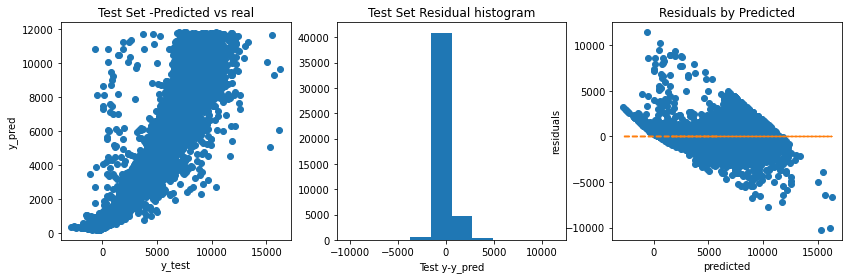

In [106]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscedasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,residual,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")  # shows me the error!!
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [107]:
Linear_R2=r2_score(y_test,y_pred)
Linear_R2

0.8991784185901175

In [108]:
adjusted_R2_test = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_R2_test

0.8990271159703578

In [109]:
Linear_mae = mae(y_train,y_pred_train)
Linear_mae

444.9191574763627

### Making the Seaborn Residual plot

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

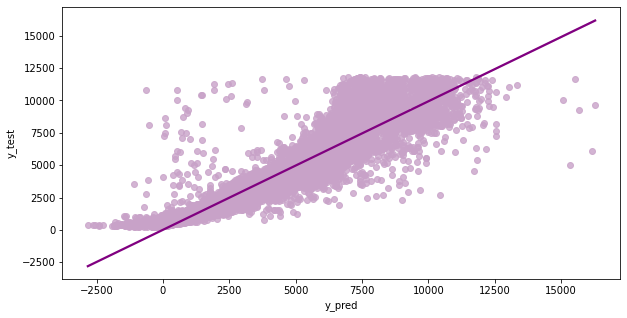

In [110]:
# using seaborn
plt.figure(figsize=(10,5))
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "#C8A2C8"}, line_kws={"color": "purple"})

### Feature Importance

In [111]:
# magnitude is important, I am checking which one is effecting my model most

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
25,cut_Fair,3.170768e+03
0,carat,2.555006e+03
63,color_M,2.506476e+03
10,shape_Marquise,2.168242e+03
13,shape_Princess,2.144747e+03
...,...,...
65,fluor_intensity_None,1.235044e+01
46,girdle_max_VTK,7.406813e+00
41,girdle_min_XTN,3.432238e+00
2,table_percent,2.982496e+00


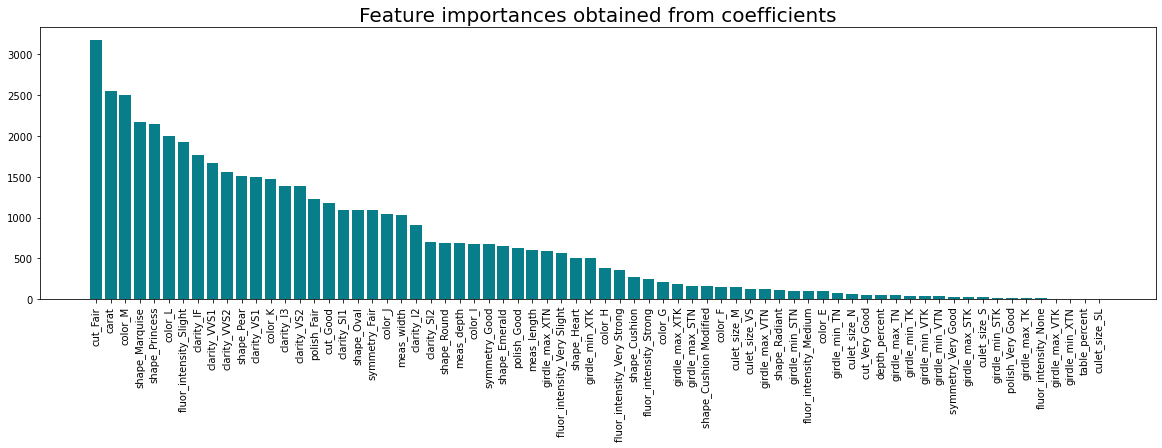

In [112]:
plt.figure(figsize=(20,5)) # this one I add to make it smaller
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Lasso

In [113]:
from sklearn.linear_model import Lasso

In [114]:
X_train1=pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_test1=pd.concat([X_num_test_scaled, X_cat_test], axis=1)

In [115]:
las01 = Lasso(alpha = 0.000001)
las01.fit(X_train1, y_train)
y_pred2 = las01.predict(X_test1)
y_pred_train2=las01.predict(X_train1)

Lasso_R2=r2_score(y_pred2, y_test)
Lasso_R2

C:\Users\isikh\anaconda3\envs\DA_Env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.942e+10, tolerance: 6.025e+07
  model = cd_fast.enet_coordinate_descent(


0.8895604585903526

In [116]:
Lasso_mae = mae(y_train,y_pred_train2)
Lasso_mae

444.85284064538416

<AxesSubplot:xlabel='y_pred2', ylabel='y_test'>

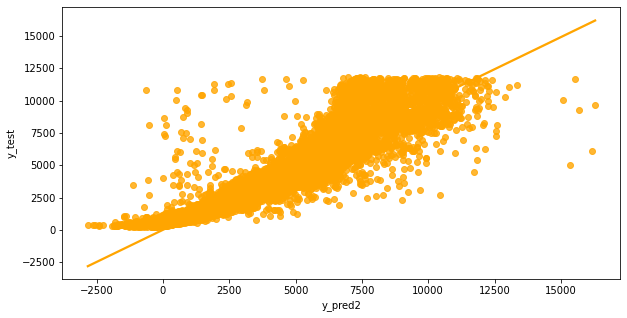

In [117]:
result_lasso=pd.DataFrame({"y_test":y_test,"y_pred2":y_pred2})
plt.figure(figsize=(10,5))
sns.regplot(x='y_pred2',y='y_test', data=result_lasso, scatter_kws={"color": "orange"}, line_kws={"color": "orange"})

In [118]:
X_train2=pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_test2=pd.concat([X_num_test_scaled, X_cat_test], axis=1)

In [119]:
las1 = Lasso(alpha = 1)
las1.fit(X_train2, y_train)
y_pred3 = las1.predict(X_test2)
y_pred_train3=las1.predict(X_train2)

r2_score(y_pred3, y_test)

0.8862717773497679

In [120]:
mae(y_train,y_pred_train3)

444.2326159732435

### Ridge

In [121]:
X_train3=pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_test3=pd.concat([X_num_test_scaled, X_cat_test], axis=1)

In [122]:
from sklearn.linear_model import Ridge
r = Ridge(alpha = 0.011)
r.fit(X_train3, y_train)
y_pred4 = r.predict(X_test)
y_pred_train4=r.predict(X_train3)

Ridge_R2=r2_score(y_pred4, y_test)
Ridge_R2

0.8895594036065272

In [123]:
Ridge_mae = mae(y_train,y_pred_train4)
Ridge_mae 

444.9191537260553

<AxesSubplot:xlabel='y_pred4', ylabel='y_test'>

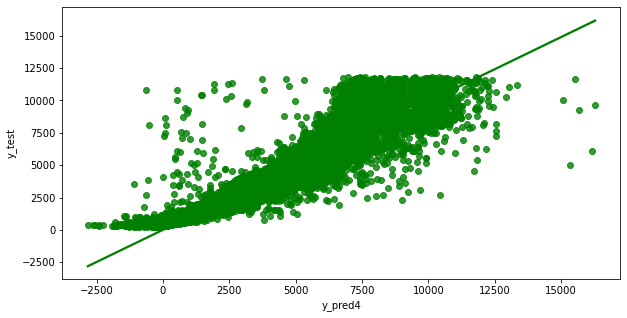

In [128]:
result_ridge=pd.DataFrame({"y_test":y_test,"y_pred4":y_pred4})
plt.figure(figsize=(10,5))
sns.regplot(x='y_pred4',y='y_test', data=result_ridge, scatter_kws={"color": "green"}, line_kws={"color": "green"})

In [124]:
X_train4=pd.concat([X_num_train_scaled, X_cat_train], axis=1)
X_test4=pd.concat([X_num_test_scaled, X_cat_test], axis=1)

In [125]:
r = Ridge(alpha = 1)
r.fit(X_train4, y_train)
y_pred5 = r.predict(X_test)
y_pred_train5=r.predict(X_train4)

r2_score(y_pred5, y_test)

0.8895270232574956

In [126]:
print('Linear Regression')
print('R2 = ' , Linear_R2)
print('MAE = ' , Linear_mae)
print('Lasso')
print('R2 = ' , Lasso_R2)
print('MAE = ' , Lasso_mae)
print('Ridge')
print('R2 = ' , Ridge_R2)
print('MAE = ' , Ridge_mae)

Linear Regression
R2 =  0.8991784185901175
MAE =  444.9191574763627
Lasso
R2 =  0.8895604585903526
MAE =  444.85284064538416
Ridge
R2 =  0.8895594036065272
MAE =  444.9191537260553
